# <font color='red'> Project 2

### Project Description:
- Use the same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.You can use the same preprocessing steps as it was used in Project 1. 
- Apply recommended changes if there is any. 

### Regression Task:
- Apply any two models with bagging and any two models with pasting. 
- Apply any two models with AdaBoost boosting. 
- Apply gradient boosting. 
- Apply PCA on data and then apply all the models in project 1 again on the post PCA data. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. Does PCA help in getting better results? 
- Apply deep learning models (MLP) covered in class. 

### Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting. 
- Apply any two models with bagging and any two models with pasting. 
- Apply any two models with AdaBoost boosting. 
- Apply one model with gradient boosting. 
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class. 
- In all the classification tasks, consider the evaluation function you used in Project 1. 

### Deliverables:
- Use markdown to provide inline comments for this project. 
- Use markdown to create final report for this project. 
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs. 
- Visualization encouraged. 
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convention:
    - ``Project2_Regression_GroupXX_Lastname1_Lastname2.ipynb``
    - ``Project2_Classification_GroupXX_Lastname1_Lastname2.ipynb``
  
  then zip these two files and the csv files of the two datasets into one file and submit. 
- If you are submitting a single file, then please follow below naming convention:
    - ``Project2_Both_GroupXX_Lastname1_Lastname2.ipynb``
    
    then zip this file and the csv files of the two datasets into one file and submit. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
fizsize_with_subplots = (20, 20)

In [2]:
df = pd.read_csv('insurance null.csv')

# Data Exploration and Cleaning

In [3]:
list(df)

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'Gender',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'EmploymentStatus',
 'Income']

Based on the columns of our data set we can see our Target Variable is Monthly Premium Auto

Lets deeply search our data set to see what type of data types we are working with

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       1032 non-null   object 
 1   State                          1030 non-null   object 
 2   Response                       1033 non-null   object 
 3   Coverage                       1028 non-null   object 
 4   Education                      1028 non-null   object 
 5   Effective To Date              1031 non-null   object 
 6   Gender                         1031 non-null   object 
 7   Location Code                  1028 non-null   object 
 8   Marital Status                 1035 non-null   object 
 9   Monthly Premium Auto           1031 non-null   float64
 10  Months Since Last Claim        1030 non-null   float64
 11  Months Since Policy Inception  1033 non-null   float64
 12  Number of Open Complaints      1032 non-null   f

In [5]:
df.shape

(1035, 23)

In [6]:
df.describe()

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Income
count,1031.000000,1030.000000,1033.000000,1032.000000,1033.000000,1033.000000,1035.000000
mean,93.915616,15.309709,47.472410,0.343992,2.986447,454.650768,36200.622222
std,34.665078,9.978217,28.582016,0.873626,2.391403,318.340980,30428.327030
min,61.000000,0.000000,0.000000,0.000000,1.000000,2.823303,0.000000
25%,69.000000,6.250000,22.000000,0.000000,1.000000,289.772690,0.000000
50%,85.000000,14.000000,47.000000,0.000000,2.000000,388.800000,30064.000000
75%,110.000000,24.000000,72.000000,0.000000,4.000000,561.600000,60926.000000
max,286.000000,35.000000,99.000000,5.000000,9.000000,2452.894264,99845.000000


Our dataset has 1035 rows and 23 columns preprocessing

In [7]:
print(f'We have a {(df.isnull().sum().sum() * 100 / len(df)):.2f}% of missing values in our dataset') 

We have a 8.31% of missing values in our dataset


As we can see that we have some missing values in our data set that we will need to clean before we start our modeling

In [8]:
df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,Gender,Location Code,Marital Status,Monthly Premium Auto,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,EmploymentStatus,Income
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,F,Suburban,Single,283.0,...,1.0,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,Employed,51643
1,XK87182,Oregon,No,Premium,College,1/25/2011,F,Urban,Married,113.0,...,1.0,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize,Employed,46402
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,M,Urban,Married,132.0,...,3.0,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize,Employed,92044
3,DH18269,Arizona,No,Extended,College,1/13/2011,M,Suburban,Divorced,96.0,...,2.0,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize,Medical Leave,16040
4,DP19820,Oregon,No,Extended,College,1/15/2011,M,Suburban,Single,135.0,...,2.0,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small,Unemployed,0


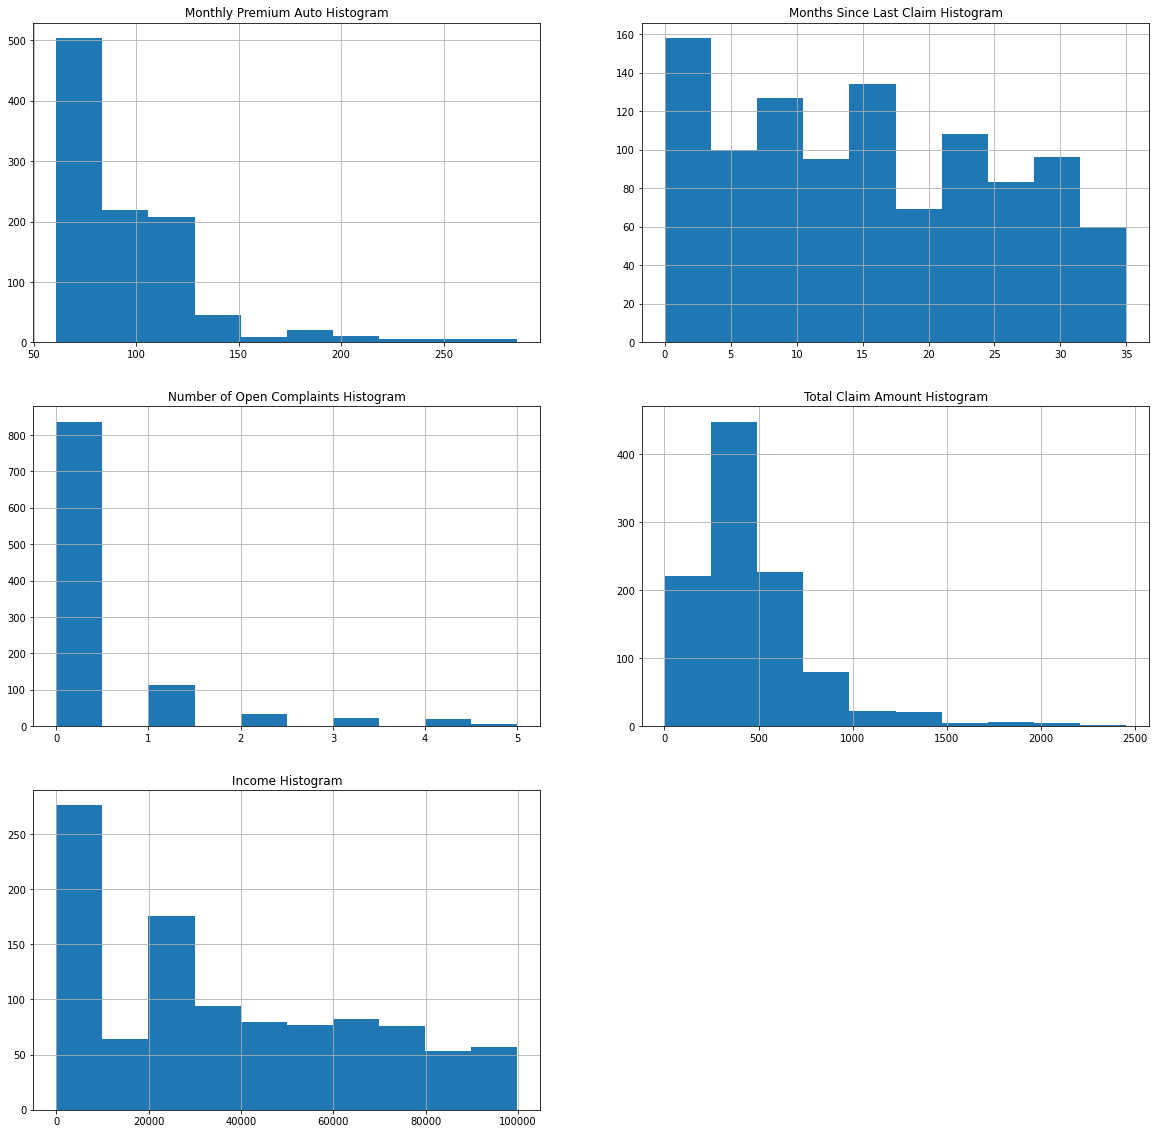

In [9]:
# Set up a grid of plots for categorical data and numerical data
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 0))
df['Monthly Premium Auto'].hist()
plt.title('Monthly Premium Auto Histogram')

# Plot the Flight Distance histogram
plt.subplot2grid(fig_dims, (0, 1))
df['Months Since Last Claim'].hist()
plt.title('Months Since Last Claim Histogram')

# Plot the wifi service histogram
plt.subplot2grid(fig_dims, (1, 0))
df['Months Since Policy Inception'].hist()
plt.title('Months Since Policy Inception Histogram')

# Plot the Departure/Arrival time convenient histogram
plt.subplot2grid(fig_dims, (1, 0))
df['Number of Open Complaints'].hist()
plt.title('Number of Open Complaints Histogram')

# Plot the Ease of Online booking histogram
plt.subplot2grid(fig_dims, (1, 1))
df['Total Claim Amount'].hist()
plt.title('Total Claim Amount Histogram')

# Plot the Gate location histogram
plt.subplot2grid(fig_dims, (2, 0))
df['Income'].hist()
plt.title('Income Histogram')

plt.show()

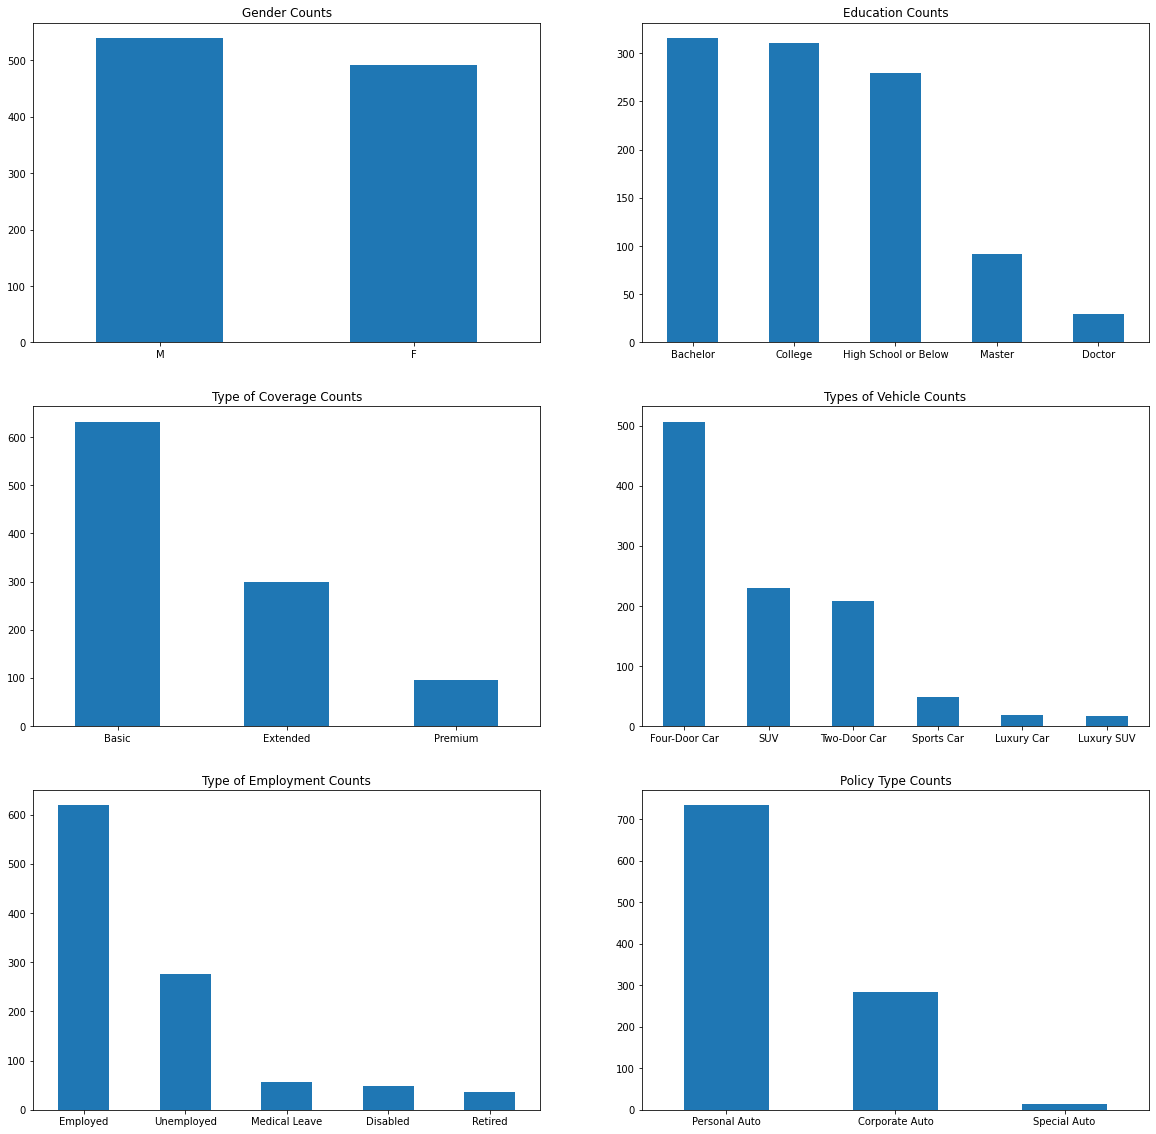

In [10]:

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Gender counts
plt.subplot2grid(fig_dims, (0, 0))
df['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')
plt.xticks(rotation=0)

# Plot Customer Type counts
plt.subplot2grid(fig_dims, (0, 1))
df['Education'].value_counts().plot(kind='bar', 
                                       title='Education Counts')
plt.xticks(rotation=0)

# Plot Type of Travel counts
plt.subplot2grid(fig_dims, (1, 0))
df['Coverage'].value_counts().plot(kind='bar', 
                                    title='Type of Coverage Counts')
plt.xticks(rotation=0)

# Plot Class counts
plt.subplot2grid(fig_dims, (1, 1))
df['Vehicle Class'].value_counts().plot(kind='bar', 
                                         title='Types of Vehicle Counts')
plt.xticks(rotation=0)

# Plot Satisfaction counts
plt.subplot2grid(fig_dims, (2, 0))
df['EmploymentStatus'].value_counts().plot(kind='bar', 
                                         title='Type of Employment Counts')
plt.xticks(rotation=0)

# Plot Satisfaction counts
plt.subplot2grid(fig_dims, (2, 1))
df['Policy Type'].value_counts().plot(kind='bar', 
                                         title='Policy Type Counts')
plt.xticks(rotation=0)

plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Monthly Premium Auto'),
  Text(1.5, 0, 'Months Since Last Claim'),
  Text(2.5, 0, 'Months Since Policy Inception'),
  Text(3.5, 0, 'Number of Open Complaints'),
  Text(4.5, 0, 'Number of Policies'),
  Text(5.5, 0, 'Total Claim Amount'),
  Text(6.5, 0, 'Income')])

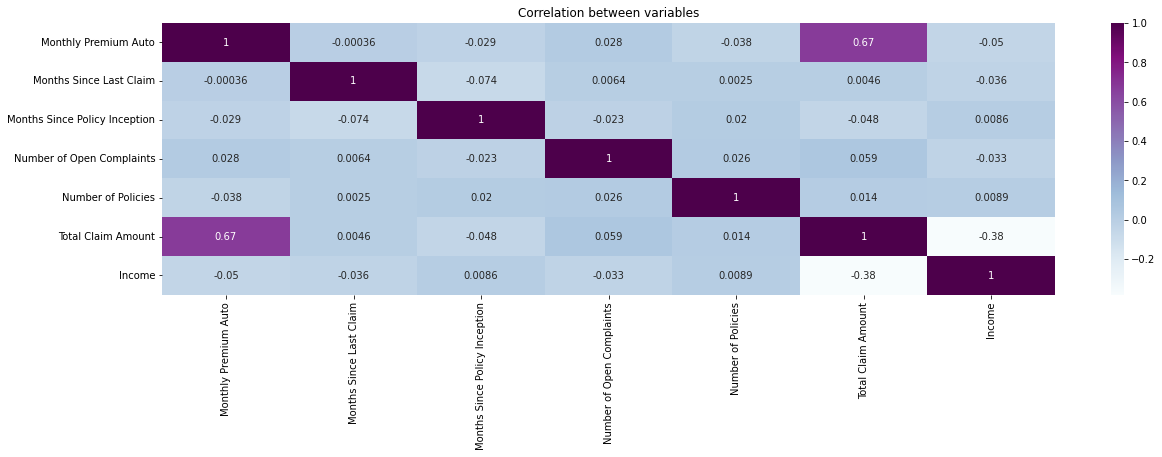

In [11]:
plt.subplots(figsize=(20,5))
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='BuPu')
plt.title('Correlation between variables')
plt.xticks(rotation=90)


In [12]:
df.drop(['Customer', 'Effective To Date', 'Income', 'Renew Offer Type', 'Policy' , 'Sales Channel'
        ], axis = 1, inplace = True)

I dropped the following columns listed above. I decided to drop Customer since it was an identification and will not be needed when running our models. Effective to Date was dropped since it was a date. Income seemed redundent when predicting total claim amount. Employment status also indicates us salary. Policy Type has a subset that is much more descriptive and provides more insight so we can keep that instead of Policy Type. Sales channel is the way the policy was bought, not important for our task

In [13]:
df.isnull().sum()

State                            5
Response                         2
Coverage                         7
Education                        7
Gender                           4
Location Code                    7
Marital Status                   0
Monthly Premium Auto             4
Months Since Last Claim          5
Months Since Policy Inception    2
Number of Open Complaints        3
Number of Policies               2
Policy Type                      4
Total Claim Amount               2
Vehicle Class                    6
Vehicle Size                     4
EmploymentStatus                 0
dtype: int64

In [14]:
df['Response'].fillna(df['Response'].mode()[0], inplace = True)
df['Response'].value_counts()

No     900
Yes    135
Name: Response, dtype: int64

In [15]:
df['Coverage'].fillna(df['Coverage'].mode()[0], inplace = True)
df['Coverage'].value_counts()

Basic       639
Extended    300
Premium      96
Name: Coverage, dtype: int64

In [16]:
df['Education'].fillna(df['Education'].mode()[0], inplace = True)
df['Education'].value_counts()

Bachelor                323
College                 311
High School or Below    280
Master                   92
Doctor                   29
Name: Education, dtype: int64

In [17]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Gender'].value_counts()

M    544
F    491
Name: Gender, dtype: int64

In [18]:
df['Location Code'].fillna(df['Location Code'].mode()[0], inplace = True)
df['Location Code'].value_counts()

Suburban    681
Urban       179
Rural       175
Name: Location Code, dtype: int64

In [19]:
df['Monthly Premium Auto'].fillna(df['Monthly Premium Auto'].mean(), inplace = True)

In [20]:
df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].mean(), inplace = True)

In [21]:
df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].mean(), inplace = True)

In [22]:
df['Months Since Policy Inception'].fillna(df['Months Since Policy Inception'].mean(), inplace = True)

In [23]:
df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].mean(), inplace = True)

In [24]:
df['Number of Policies'].fillna(df['Number of Policies'].mean(), inplace = True)

In [25]:
df['Policy Type'].fillna(df['Policy Type'].mode()[0], inplace = True)
df['Policy Type'].value_counts()

Personal Auto     738
Corporate Auto    283
Special Auto       14
Name: Policy Type, dtype: int64

In [26]:
df['Total Claim Amount'].fillna(df['Total Claim Amount'].mean(), inplace = True)

In [27]:
df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0], inplace = True)
df['Vehicle Class'].value_counts()

Four-Door Car    513
SUV              230
Two-Door Car     209
Sports Car        48
Luxury Car        18
Luxury SUV        17
Name: Vehicle Class, dtype: int64

In [28]:
df['Vehicle Size'].fillna(df['Vehicle Size'].mode()[0], inplace = True)
df['Vehicle Size'].value_counts()

Medsize    755
Small      178
Large      102
Name: Vehicle Size, dtype: int64

In [29]:
df['State'].fillna(df['State'].mode()[0], inplace = True)
df['State'].value_counts()

California    776
Oregon        126
Arizona        63
Nevada         40
Washington     30
Name: State, dtype: int64

In [30]:
df.isnull().sum()

State                            0
Response                         0
Coverage                         0
Education                        0
Gender                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
EmploymentStatus                 0
dtype: int64

Time to mask our variables or create dummy variables from our data set

In [31]:
df['Response'] = df['Response'].map({'No':1, 'Yes': 0}).astype(int)

In [32]:
df['Coverage'] = df['Coverage'].map({'Basic':0, 'Extended': 1, 'Premium':2}).astype(int)

In [33]:
df['Education'] = df['Education'].map({'Doctor':4, 'Master':3, 'Bachelor':2, 'College':1, 'High School or Below':0}).astype(int)

In [34]:
df['Gender'] = df['Gender'].map({'M':1, 'F': 0}).astype(int)

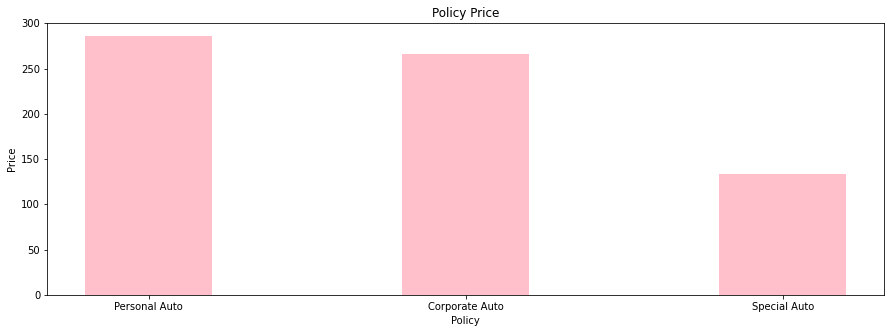

In [35]:
fig = plt.figure(figsize = (15, 5))
plt.bar(df['Policy Type'], df['Monthly Premium Auto'], color ='pink',
        width = 0.4)
plt.xlabel("Policy")
plt.ylabel("Price")
plt.title("Policy Price")
plt.show()

Since we have a clear ranking system with our policy types, we can map it such as

In [36]:
df['Policy Type'] = df['Policy Type'].map({'Personal Auto':2, 'Corporate Auto':1, 'Special Auto':0}).astype(int)

There is a clear ranking system with our vehicle class when looking at the monthly price so we should map these values

In [37]:
df2 = df.groupby('Vehicle Class').agg({'Monthly Premium Auto':['mean']})

<Figure size 1080x360 with 0 Axes>

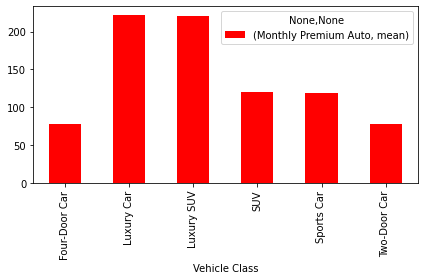

In [38]:
fig = plt.figure(figsize = (15, 5))
df2.plot(kind='bar', color = 'r')
plt.tight_layout()
plt.show()
plt.clf()
plt.close()

In [39]:
df['Vehicle Class'] = df['Vehicle Class'].map({'Luxury Car':5, 'Luxury SUV': 4, 'SUV':3, 'Sports Car':2, 'Two-Door Car':1, 'Four-Door Car':0}).astype(int)

In [40]:
df.groupby('EmploymentStatus').agg({'Monthly Premium Auto':['mean']})

,Monthly Premium Auto
,mean
EmploymentStatus,
Disabled,96.375000
Employed,92.674737
Medical Leave,87.535714
Retired,89.444444
Unemployed,98.148551


Nothing really here to tell us a trend if employment status has a ranking system, we should dummy variable these

In [41]:
cols = pd.get_dummies(df['EmploymentStatus'], prefix= 'EmploymentStatus')
df[cols.columns] = cols
df.drop('EmploymentStatus', axis = 1, inplace = True)

In [42]:
cols = pd.get_dummies(df['Location Code'], prefix= 'Location Code')
df[cols.columns] = cols
df.drop('Location Code', axis = 1, inplace = True)

In [43]:
cols = pd.get_dummies(df['Vehicle Size'], prefix= 'Vehicle Size')
df[cols.columns] = cols
df.drop('Vehicle Size', axis = 1, inplace = True)

In [44]:
cols = pd.get_dummies(df['Marital Status'], prefix= 'Marital Status')
df[cols.columns] = cols
df.drop('Marital Status', axis = 1, inplace = True)

In [45]:
cols = pd.get_dummies(df['State'], prefix= 'State')
df[cols.columns] = cols
df.drop('State', axis = 1, inplace = True)

In [46]:
df

,Response,Coverage,Education,Gender,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,...,Vehicle Size_Medsize,Vehicle Size_Small,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington
0,0,2,2,0,283.0,16.0,43.0,0.000000,1.0,2,...,1,0,0,0,1,0,1,0,0,0
1,1,2,1,0,113.0,7.0,2.0,0.000000,1.0,2,...,1,0,0,1,0,0,0,0,1,0
2,1,1,2,1,132.0,7.0,77.0,0.000000,3.0,2,...,1,0,0,1,0,0,0,0,0,1
3,1,1,1,1,96.0,29.0,93.0,0.000000,2.0,2,...,1,0,1,0,0,1,0,0,0,0
4,1,1,1,1,135.0,12.0,84.0,0.343992,2.0,2,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1,0,2,1,73.0,18.0,89.0,0.000000,2.0,2,...,1,0,0,1,0,0,1,0,0,0
1031,0,1,1,0,79.0,14.0,28.0,0.000000,1.0,1,...,1,0,1,0,0,0,1,0,0,0
1032,1,1,2,1,85.0,9.0,37.0,3.000000,2.0,1,...,1,0,0,0,1,0,1,0,0,0
1033,1,1,1,1,96.0,34.0,3.0,0.000000,3.0,2,...,0,0,0,1,0,0,1,0,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Response                        1035 non-null   int64  
 1   Coverage                        1035 non-null   int64  
 2   Education                       1035 non-null   int64  
 3   Gender                          1035 non-null   int64  
 4   Monthly Premium Auto            1035 non-null   float64
 5   Months Since Last Claim         1035 non-null   float64
 6   Months Since Policy Inception   1035 non-null   float64
 7   Number of Open Complaints       1035 non-null   float64
 8   Number of Policies              1035 non-null   float64
 9   Policy Type                     1035 non-null   int64  
 10  Total Claim Amount              1035 non-null   float64
 11  Vehicle Class                   1035 non-null   int64  
 12  EmploymentStatus_Disabled       10

In [48]:
df.shape

(1035, 31)

# Split Data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Monthly Premium Auto', axis = 1)
y = df['Monthly Premium Auto']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

As we saw before, we have some data that are skewed, so a minmax splitter could balance any skewness and imbalance

In [50]:
list(X)

['Response',
 'Coverage',
 'Education',
 'Gender',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Total Claim Amount',
 'Vehicle Class',
 'EmploymentStatus_Disabled',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed',
 'Location Code_Rural',
 'Location Code_Suburban',
 'Location Code_Urban',
 'Vehicle Size_Large',
 'Vehicle Size_Medsize',
 'Vehicle Size_Small',
 'Marital Status_Divorced',
 'Marital Status_Married',
 'Marital Status_Single',
 'State_Arizona',
 'State_California',
 'State_Nevada',
 'State_Oregon',
 'State_Washington']

# Bagging

In [51]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [52]:
param_griddtr = {'max_features': [0.1, 0.2, 0.5, 1], 'n_estimators':[100, 200, 300, 500], 'max_samples':[0.1, 0.5, 1]}

In [53]:
dt = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 10, random_state = 0)
grid_searchdtr = GridSearchCV(BaggingRegressor(dt, bootstrap = True, random_state=0), param_griddtr, cv=5, n_jobs = -1, return_train_score=True)

In [54]:
grid_searchdtr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                                             max_leaf_nodes=10,
                                                                             random_state=0),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]},
             return_train_score=True)

In [55]:
print("Best parameters: {}".format(grid_searchdtr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchdtr.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.8488


In [177]:
bgr = BaggingRegressor(dt,max_features= 0.5, max_samples= 0.5, n_estimators= 100, random_state = 0, bootstrap = True, oob_score = True )
bgr.fit(X_train, y_train)
print('Train score: %.4f'%(bgr.score(X_train, y_train)))
print('Test score: %.4f'%(bgr.score(X_test, y_test)))
print('Out-of-bag score: %.4f'%bgr.oob_score_)

Train score: 0.8818
Test score: 0.8299
Out-of-bag score: 0.8491


In [57]:
dt = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 10, random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, random_state=0)

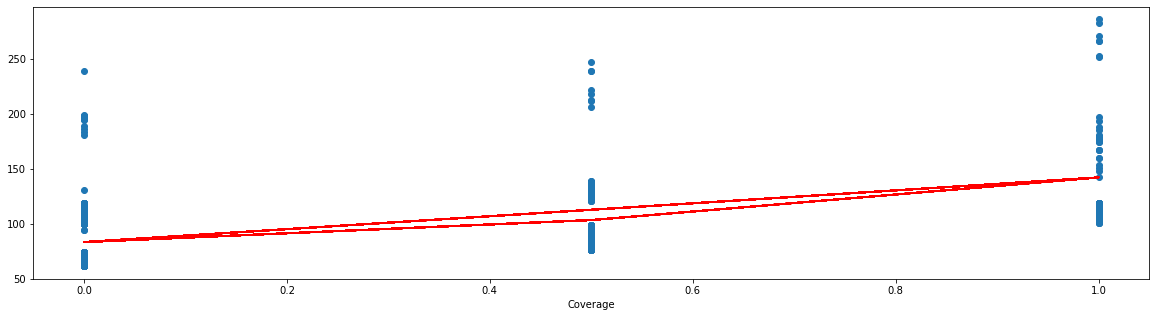

In [58]:
%matplotlib inline

X_train_rm = X_train[:,1].reshape(-1,1)
bgr.fit(X_train_rm, y_train)
y_predict = bgr.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Coverage')
plt.show()

In [59]:
from sklearn.svm import SVR

In [60]:
svr = SVR(kernel='linear', C = 100, epsilon = 10, gamma = 0.01)
grid_searchsvr = GridSearchCV(BaggingRegressor(svr, bootstrap = True, random_state=0), param_griddtr, cv=5, n_jobs = -1, return_train_score=True)

In [61]:
grid_searchsvr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=SVR(C=100, epsilon=10,
                                                           gamma=0.01,
                                                           kernel='linear'),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]},
             return_train_score=True)

In [62]:
print("Best parameters: {}".format(grid_searchsvr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvr.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.7274


In [176]:
svr_bgr = BaggingRegressor(svr,max_features= 0.5, max_samples= 0.5, n_estimators= 100, random_state = 0, bootstrap = True, oob_score = True )
svr_bgr.fit(X_train, y_train) 
print('Train score: %.4f'%(svr_bgr.score(X_train, y_train)))
print('Test score: %.4f'%(svr_bgr.score(X_test, y_test)))
print('Out-of-bag score: %.4f'%svr_bgr.oob_score_)

Train score: 0.7333
Test score: 0.7057
Out-of-bag score: 0.7254


Text(0.5, 0, 'Total Claim Amount')

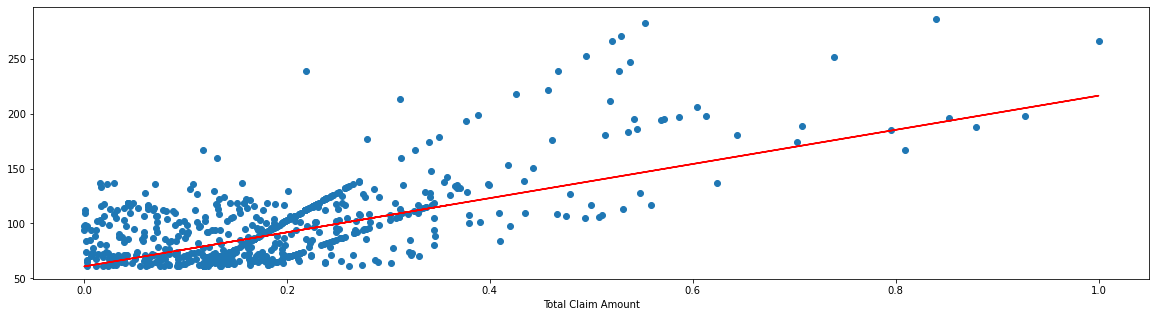

In [64]:
%matplotlib inline

X_train_rm = X_train[:,9].reshape(-1,1)
svr_bgr.fit(X_train_rm, y_train)
y_predict = svr_bgr.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Total Claim Amount')

# Pasting

In [65]:
grid_searchdtrp = GridSearchCV(BaggingRegressor(dt, bootstrap = False, random_state=0), param_griddtr, cv=5, n_jobs = -1, return_train_score=True)

In [66]:
grid_searchdtrp.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                                             max_leaf_nodes=10,
                                                                             random_state=0),
                                        bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]},
             return_train_score=True)

In [67]:
print("Best parameters: {}".format(grid_searchdtrp.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchdtrp.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.8508


In [178]:
bgrp = BaggingRegressor(dt,max_features= 0.5, max_samples= 0.5, n_estimators= 100, random_state = 0, bootstrap = False )
bgrp.fit(X_train, y_train)
print('Train score: %.4f'%(bgrp.score(X_train, y_train)))
print('Test score: %.4f'%(bgrp.score(X_test, y_test)))

Train score: 0.8834
Test score: 0.8334


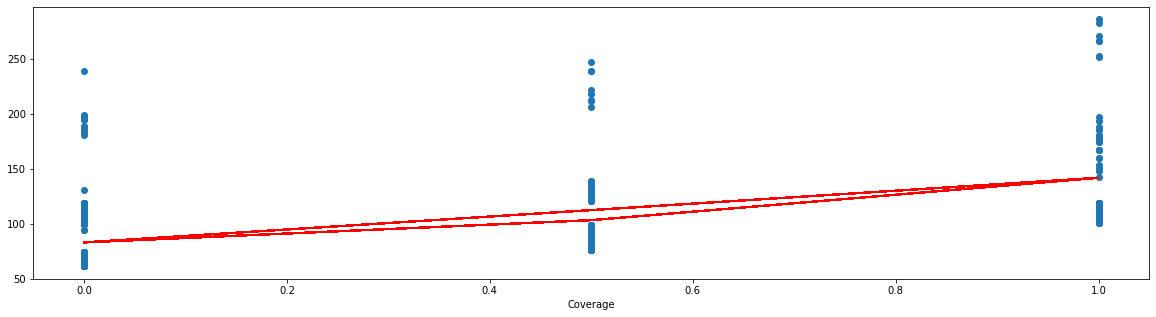

In [69]:
%matplotlib inline

X_train_rm = X_train[:,1].reshape(-1,1)
bgrp.fit(X_train_rm, y_train)
y_predict = bgrp.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Coverage')
plt.show()

In [70]:
grid_searchsvrp = GridSearchCV(BaggingRegressor(svr, bootstrap = False, random_state=0), param_griddtr, cv=5, n_jobs = -1, return_train_score=True)

In [71]:
grid_searchsvrp.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=SVR(C=100, epsilon=10,
                                                           gamma=0.01,
                                                           kernel='linear'),
                                        bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]},
             return_train_score=True)

In [72]:
print("Best parameters: {}".format(grid_searchsvrp.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvrp.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.7249


In [179]:
svr_bgrp = BaggingRegressor(svr,max_features= 0.5, max_samples= 0.5, n_estimators= 100, random_state = 0, bootstrap = False )
svr_bgrp.fit(X_train, y_train)
print('Train score: %.4f'%(svr_bgrp.score(X_train, y_train)))
print('Test score: %.4f'%(svr_bgrp.score(X_test, y_test)))

Train score: 0.7330
Test score: 0.7055


Text(0.5, 0, 'Total Claim Amount')

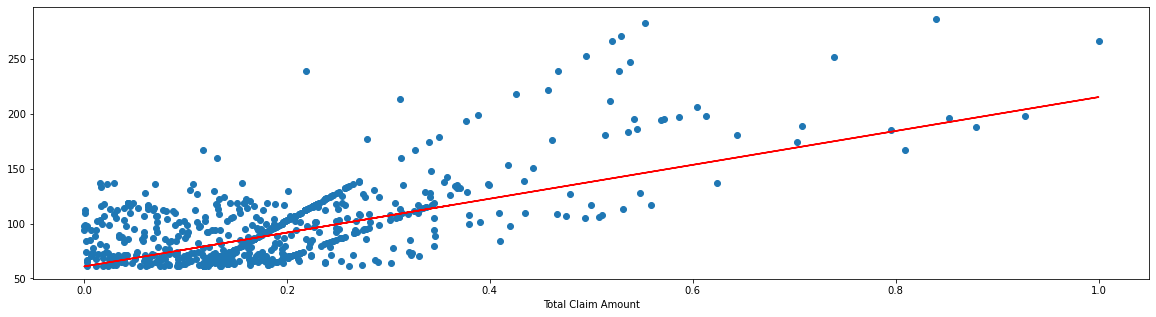

In [74]:
%matplotlib inline

X_train_rm = X_train[:,9].reshape(-1,1)
svr_bgrp.fit(X_train_rm, y_train)
y_predict = svr_bgrp.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Total Claim Amount')

# AdaBoosting

AdaBoostingRegressor with Decision Tree Regressor

In [75]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
param_gridada = {'n_estimators':[1,10,100,200,500,1000] ,
    'learning_rate':[0.001, 0.01, 0.1, 1,10,100]}

In [77]:
grid_searchada = GridSearchCV(AdaBoostRegressor(dt, random_state = 0), param_gridada, cv=5, n_jobs = -1, return_train_score=True)

In [78]:
grid_searchada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                                              max_leaf_nodes=10,
                                                                              random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [1, 10, 100, 200, 500, 1000]},
             return_train_score=True)

In [79]:
print("Best parameters: {}".format(grid_searchada.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchada.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score: 0.9610


In [180]:
adadtr = AdaBoostRegressor(dt, learning_rate =  0.01, n_estimators = 200, random_state = 0)
adadtr.fit(X_train, y_train)
print('Train score: %.4f'%(adadtr.score(X_train, y_train)))
print('Test score: %.4f'%(adadtr.score(X_test, y_test)))

Train score: 0.9679
Test score: 0.9275


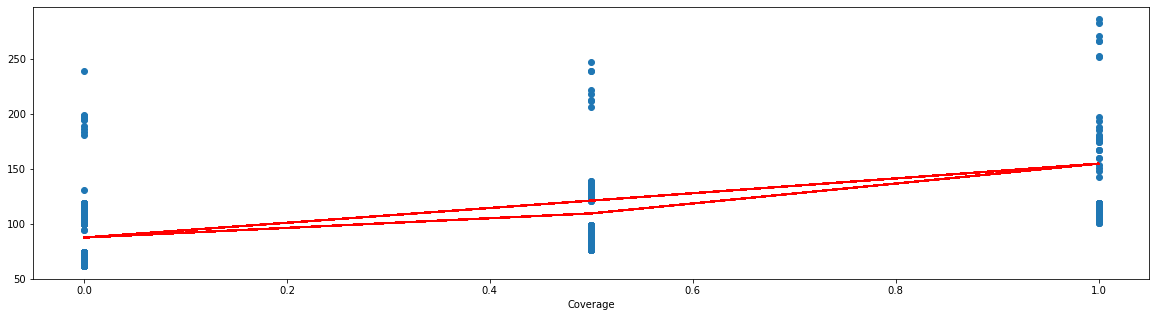

In [81]:
%matplotlib inline

X_train_rm = X_train[:,1].reshape(-1,1)
adadtr.fit(X_train_rm, y_train)
y_predict = adadtr.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Coverage')
plt.show()

AdaBoostingRegressor with Linear Regressor

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lreg = LinearRegression()

In [84]:
grid_searchadalr = GridSearchCV(AdaBoostRegressor(lreg ,random_state = 0), param_gridada, cv=5, return_train_score=True, n_jobs = -1)

In [85]:
grid_searchadalr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [1, 10, 100, 200, 500, 1000]},
             return_train_score=True)

In [86]:
print("Best parameters: {}".format(grid_searchadalr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchadalr.best_score_))

Best parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Best cross-validation score: 0.8519


In [181]:
adalr = AdaBoostRegressor(lreg, learning_rate =  0.001, n_estimators = 200, random_state = 0)
adalr.fit(X_train, y_train)
print('Train score: %.4f'%(adalr.score(X_train, y_train)))
print('Test score: %.4f'%(adalr.score(X_test, y_test)))

Train score: 0.8659
Test score: 0.8214


Text(0.5, 0, 'Total Claim Amount')

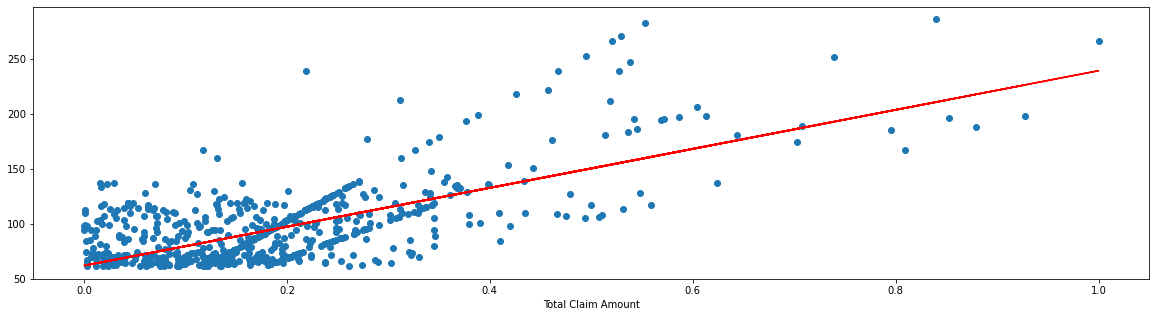

In [88]:
X_train_rm = X_train[:,9].reshape(-1,1)
adalr.fit(X_train_rm, y_train)
y_predict = adalr.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Total Claim Amount')

# Gradient Boosting Regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
param_gridgbr = {'n_estimators':[1,10,100,200,500,1000] ,
    'learning_rate':[0.001, 0.01, 0.1,1,10],
                'max_depth': [1, 2, 5]}

In [91]:
grid_searchgbr = GridSearchCV(GradientBoostingRegressor(random_state = 0), param_gridgbr, cv=5, return_train_score=True, n_jobs=-1)

In [92]:
grid_searchgbr.fit(X_train, y_train)

C:\Users\Mohammed Rahman\Documents\utda\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-2.66733198e-003  4.63366395e-003  7.76145463e-002  1.59471509e-001
  3.49772049e-001  5.39579288e-001 -1.84963467e-003  1.27372950e-002
  1.45048614e-001  2.66689479e-001  5.09913473e-001  7.26972034e-001
 -1.53531482e-003  1.57990883e-002  1.72954160e-001  3.17735213e-001
  6.12061458e-001  8.36604102e-001  4.67009051e-003  7.76989017e-002
  5.41102523e-001  7.52832257e-001  9.30165792e-001  9.52449815e-001
  1.28100703e-002  1.45656365e-001  7.28295732e-001  8.97703122e-001
  9.55502838e-001  9.58516650e-001  1.59371780e-002  1.73206762e-001
  8.37147634e-001  9.46300983e-001  9.62986445e-001  9.62659147e-001
  7.44332573e-002  5.53154157e-001  9.52368829e-001  9.52944557e-001
  9.52096518e-001  9.51853202e-001  1.52133726e-001  7.37362730e-001
  9.57898735e-001  9.59382539e-001  9.57472514e-001  9.54916530e-001
  1.81795723e-

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 5],
                         'n_estimators': [1, 10, 100, 200, 500, 1000]},
             return_train_score=True)

In [93]:
print("Best parameters: {}".format(grid_searchgbr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchgbr.best_score_))

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Best cross-validation score: 0.9630


In [182]:
gbr = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 5, n_estimators= 500, random_state = 0)
gbr.fit(X_train, y_train)
print('Train score: %.4f'%(gbr.score(X_train, y_train)))
print('Test score: %.4f'%(gbr.score(X_test, y_test)))

Train score: 0.9909
Test score: 0.9304


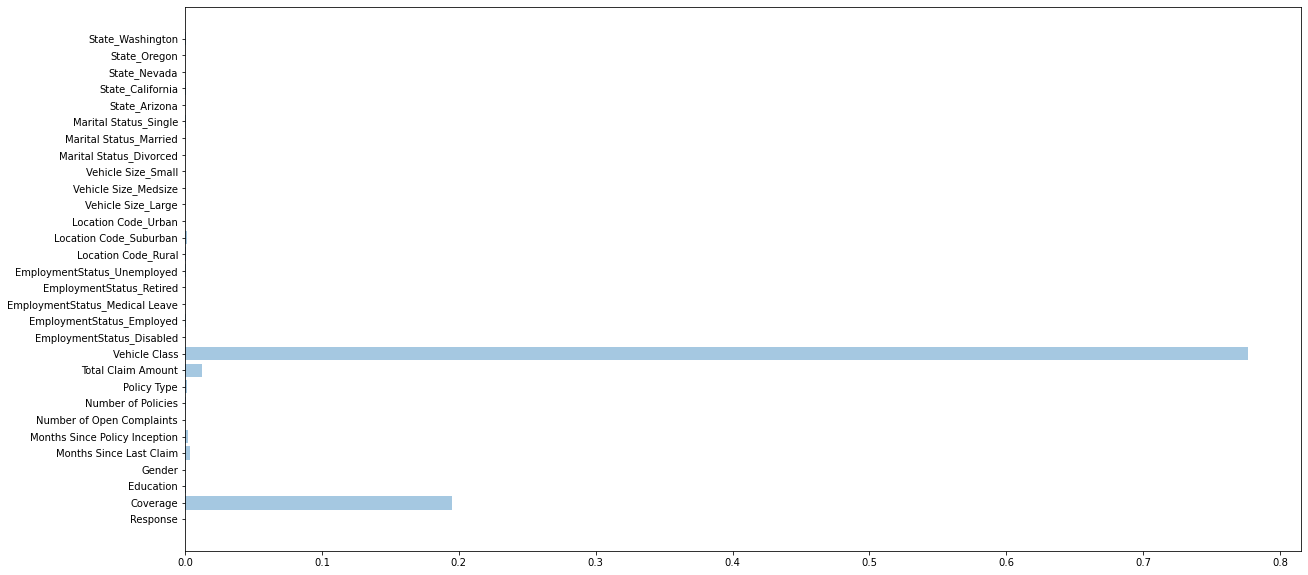

In [95]:
plt.subplots(figsize = (20,10))
y_list = gbr.feature_importances_
y_pos = np.arange(len(y_list))
features = X
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.show()

# PCA

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(n_components= 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [98]:
X_train_pca.shape

(776, 20)

# Linear Regression PCA

In [99]:
lregpca = LinearRegression()
lregpca.fit(X_train_pca, y_train)
print(lregpca.score(X_train_pca, y_train))
print(lregpca.score(X_test_pca, y_test)) 

0.8249253561755254
0.7883099937592872


Text(0.5, 0, 'Total Claim Amount')

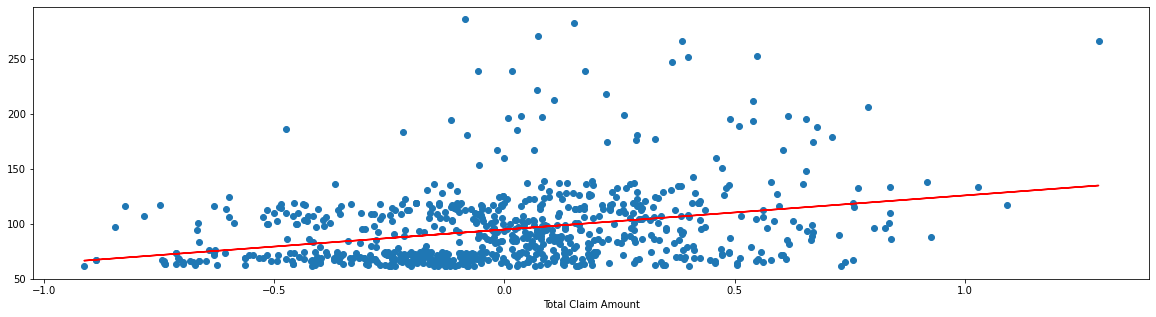

In [100]:
X_train_rm = X_train_pca[:,9].reshape(-1,1)
lregpca.fit(X_train_rm, y_train)
y_predict = lregpca.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Total Claim Amount')

# KNN PCA

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
param_gridknn = {'n_neighbors':range(1,26)}

In [103]:
grid_searchknn = GridSearchCV(KNeighborsRegressor(), param_gridknn, cv=5, return_train_score=True)

In [104]:
grid_searchknn.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 26)}, return_train_score=True)

In [105]:
print("Best parameters: {}".format(grid_searchknn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchknn.best_score_))

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.2850


In [106]:
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_train_pca, y_train)
print(knn_reg.score(X_train_pca, y_train))
print(knn_reg.score(X_test_pca, y_test))

0.509114271125084
0.26756353971909097


Text(0.5, 0, 'Total Claim Amount')

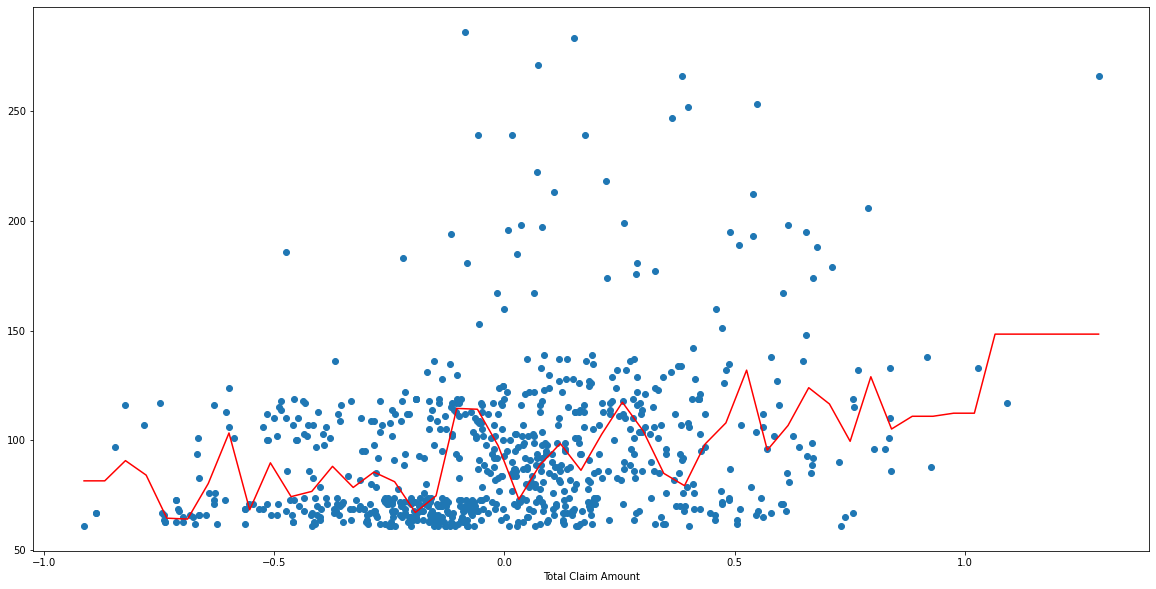

In [107]:
X_b = X_train_pca[:,9].reshape(-1,1)
y_b = y_train[:]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')

# Lasso PCA

In [108]:
from sklearn.linear_model import Lasso

In [109]:
param_gridlass = {'alpha':[.001, .01, .1, 1, 10, 100, 1000]}

In [110]:
grid_searchlass = GridSearchCV(Lasso(random_state = 0), param_gridlass, cv=5, return_train_score=True)

In [111]:
grid_searchlass.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [112]:
print("Best parameters: {}".format(grid_searchlass.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchlass.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.8122


In [113]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_pca,y_train)
print(lasso.score(X_train_pca,y_train))
print(lasso.score(X_test_pca, y_test))

0.8249105822634104
0.7886769284572288


In [114]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    train_score_list.append(lasso.score(X_train_pca,y_train))
    test_score_list.append(lasso.score(X_test_pca, y_test))

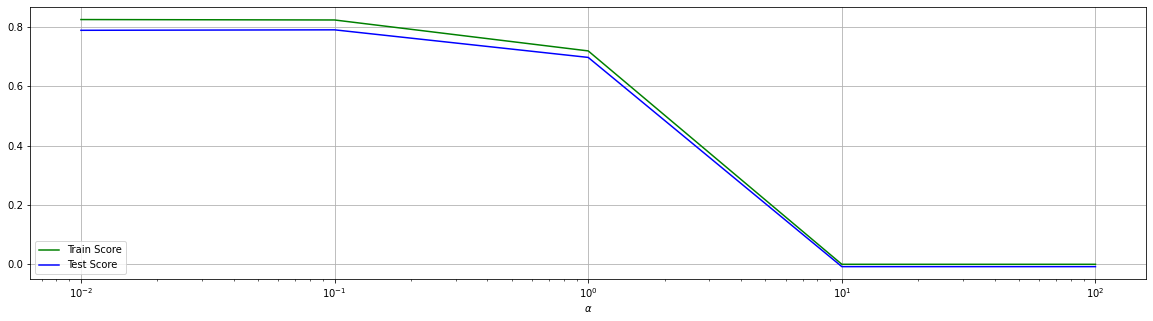

In [115]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

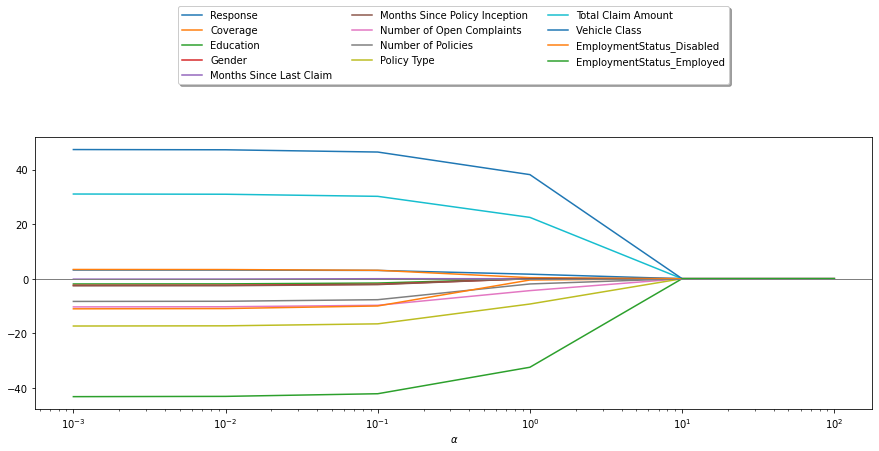

In [116]:
# %matplotlib inline


x_range = [0.001, 0.01, 0.1, 1, 10, 100]
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Ridge PCA

In [117]:
from sklearn.linear_model import Ridge

In [118]:
param_gridrid = {'alpha':[.001, .01, .1, 1, 10, 100, 1000]}

In [119]:
grid_searchrid = GridSearchCV(Ridge(random_state = 0), param_gridrid, cv=5, return_train_score=True)

In [120]:
grid_searchrid.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [121]:
print("Best parameters: {}".format(grid_searchrid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchrid.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.8126


In [122]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_pca,  y_train)
print(ridge.score(X_train_pca, y_train))
print(ridge.score(X_test_pca, y_test))

0.8247524123666333
0.7900416027866062


In [123]:
train_score_list = []
test_score_list = []

for alpha in [.001, .01, .1, 1, 10, 100, 1000]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,  y_train)
    train_score_list.append(ridge.score(X_train_pca, y_train))
    test_score_list.append(ridge.score(X_test_pca, y_test))

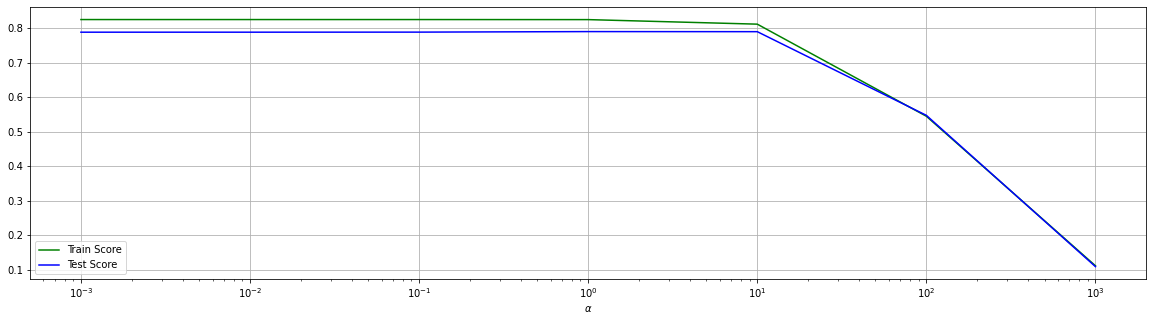

In [124]:

x_range = [.001, .01, .1, 1, 10, 100, 1000]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()
plt.show()

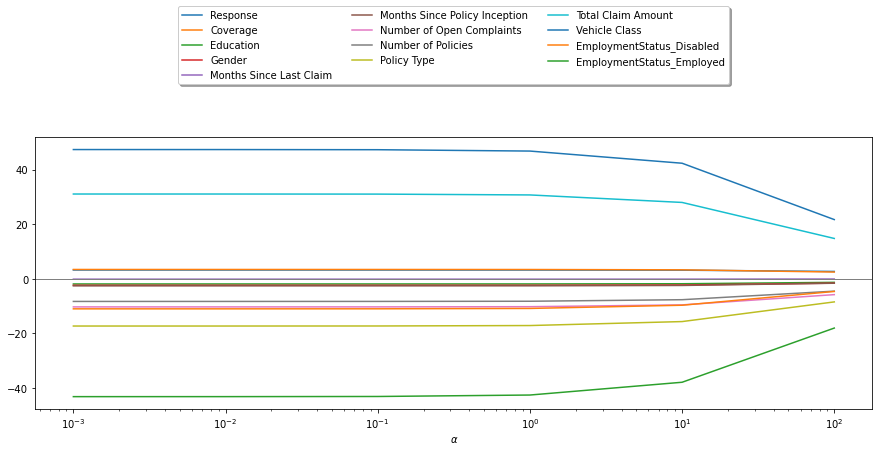

In [125]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# SVR PCA

**RBF**

In [126]:
param_gridsvr = {'C':[0.01, 0.1, 1, 10, 100],'epsilon': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

In [127]:
grid_searchsvr = GridSearchCV(SVR(kernel='rbf'), param_gridsvr, cv=5, n_jobs = -1, return_train_score=True)

In [128]:
grid_searchsvr.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [129]:
print("Best parameters: {}".format(grid_searchsvr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvr.best_score_))

Best parameters: {'C': 100, 'epsilon': 10, 'gamma': 0.1}
Best cross-validation score: 0.8070


In [130]:
regressork = SVR(kernel='rbf', C = 100, epsilon = 10, gamma = 0.1)
regressork.fit(X_train_pca,y_train)
print('train: ', regressork.score(X_train_pca, y_train))
print('test: ', regressork.score(X_test_pca, y_test))

train:  0.860288938769611
test:  0.802226462428338


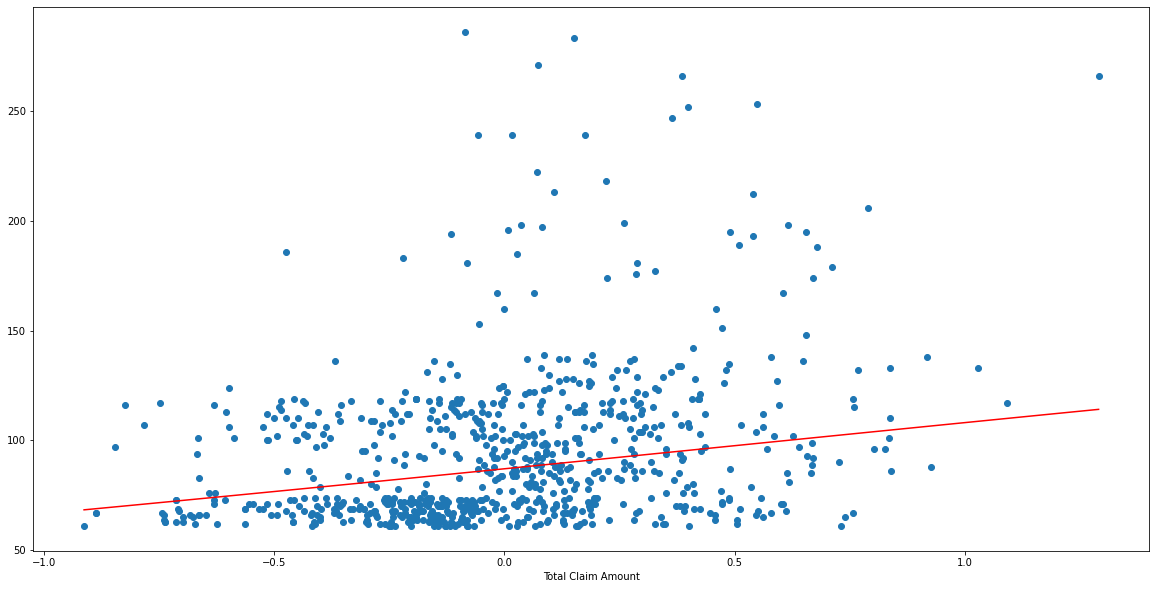

In [131]:
X_b = X_train_pca[:,9].reshape(-1,1)
y_b = y_train[:]

regressork = SVR(kernel='rbf', C = 100, epsilon = 10, gamma = 0.01)
regressork.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressork.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')
plt.show()

**Linear**

In [132]:
grid_searchsvrl = GridSearchCV(SVR(kernel='linear'), param_gridsvr, cv=5, n_jobs = -1, return_train_score=True)

In [133]:
grid_searchsvrl.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [134]:
print("Best parameters: {}".format(grid_searchsvrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvrl.best_score_))

Best parameters: {'C': 100, 'epsilon': 10, 'gamma': 0.01}
Best cross-validation score: 0.8076


In [135]:
regressorl = SVR(kernel='linear', C = 100, epsilon = 10, gamma = 0.01)
regressorl.fit(X_train_pca,y_train)
print('train: ', regressorl.score(X_train_pca, y_train))
print('test: ', regressorl.score(X_test_pca, y_test))

train:  0.8123400969223358
test:  0.78740786607627


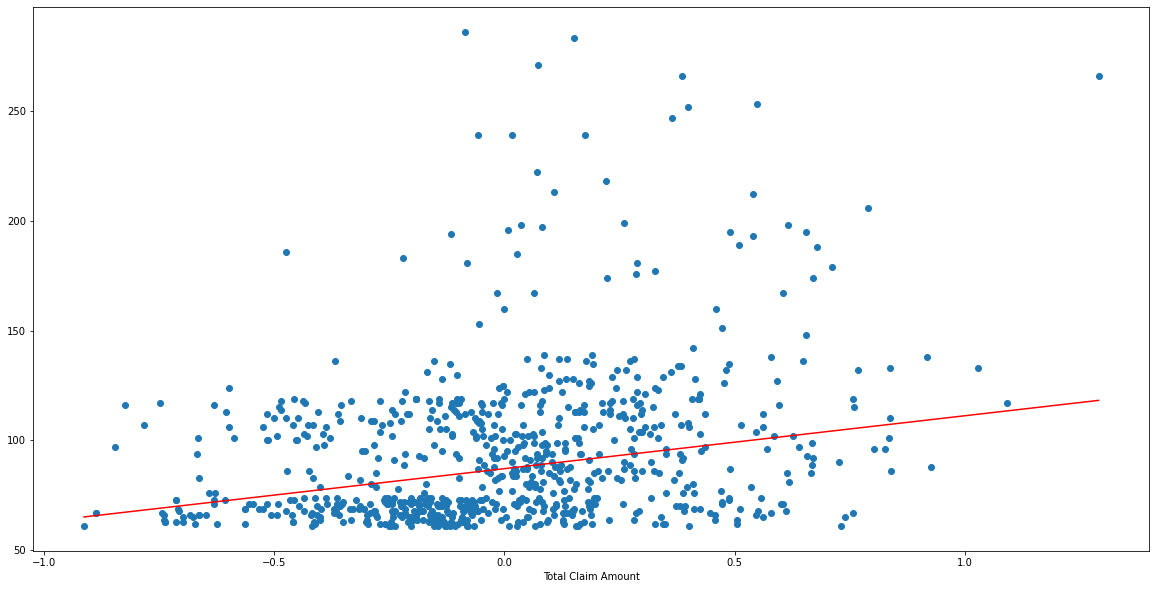

In [136]:
X_b = X_train_pca[:,9].reshape(-1,1)
y_b = y_train[:]

regressorl.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressorl.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')
plt.show()

**Poly**

In [137]:
grid_searchsvrp = GridSearchCV(SVR(kernel='poly'), param_gridsvr, cv=5, n_jobs = -1, return_train_score=True)

In [138]:
grid_searchsvrp.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [139]:
print("Best parameters: {}".format(grid_searchsvrp.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvrp.best_score_))

Best parameters: {'C': 0.01, 'epsilon': 10, 'gamma': 10}
Best cross-validation score: 0.7228


In [140]:
regressorp = SVR(kernel='poly', C = 0.01, epsilon = 10, gamma = 10)
regressorp.fit(X_train_pca,y_train)
print('train: ', regressorp.score(X_train_pca, y_train))
print('test: ', regressorp.score(X_test_pca, y_test))

train:  0.9386060261902194
test:  0.7389452185638337


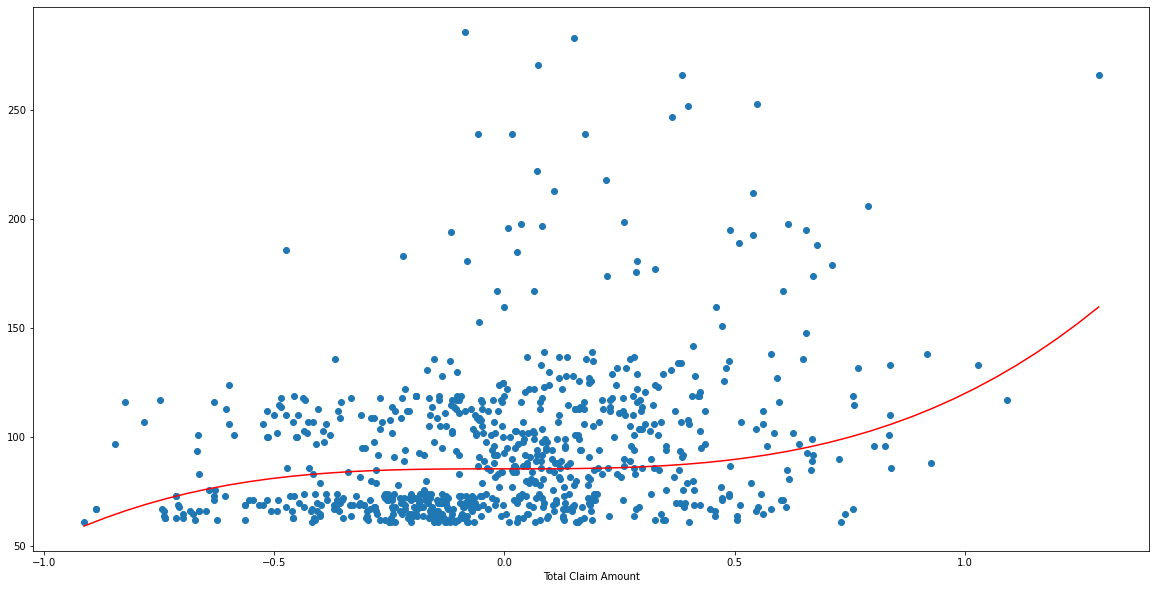

In [141]:
X_b = X_train_pca[:,9].reshape(-1,1)
y_b = y_train[:]

regressorp.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressorp.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')
plt.show()

# Decision Tree Regressor PCA

In [142]:
param_griddtr = {'max_depth':[2,5,10,25,50],'max_leaf_nodes': [2,5,10,25,50]}

In [143]:
grid_searchdtr = GridSearchCV(DecisionTreeRegressor(random_state = 0), param_griddtr, cv=5, n_jobs = -1, return_train_score=True)

In [144]:
grid_searchdtr.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 25, 50],
                         'max_leaf_nodes': [2, 5, 10, 25, 50]},
             return_train_score=True)

In [145]:
print("Best parameters: {}".format(grid_searchdtr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchdtr.best_score_))

Best parameters: {'max_depth': 2, 'max_leaf_nodes': 5}
Best cross-validation score: 0.3854


In [146]:
regressordtr = DecisionTreeRegressor(max_depth = 2 , random_state=0, max_leaf_nodes = 5)
regressordtr.fit(X_train_pca,y_train)
print('train: ', regressordtr.score(X_train_pca, y_train))
print('test: ', regressordtr.score(X_test_pca, y_test))

train:  0.4549237846392735
test:  0.468849525089574


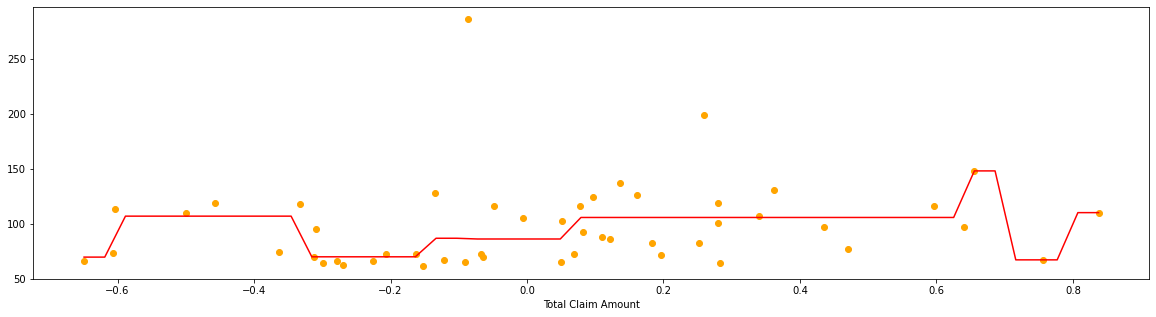

In [147]:
X_b = X_train_pca[:50,9].reshape(-1,1)
y_b = y_train[:50]

clfdtr = DecisionTreeRegressor(max_depth = 5 , random_state=0, max_leaf_nodes = 10)
clfdtr.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clfdtr.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'red')
plt.scatter(X_b, y_b, c ='orange')
plt.xlabel('Total Claim Amount')
plt.show()

# Polynomial Regression PCA

In [148]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [149]:
param_poly = {'polynomialfeatures__degree' : range(1,6) }

In [150]:
poly = PolynomialFeatures()
lr = LinearRegression()
poly_cv = make_pipeline(PolynomialFeatures() , LinearRegression())
grid_poly = GridSearchCV( poly_cv,  param_poly, cv = 5, n_jobs= -1)

In [151]:
grid_poly.fit(X_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': range(1, 6)})

In [152]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 1}
Best cross-validation score: 0.8122


In [153]:
poly = PolynomialFeatures(degree = 1)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
print('train: ', poly_reg.score(X_train_poly, y_train))
print('test: ',poly_reg.score(X_test_poly, y_test))

train:  0.8249253561755254
test:  0.7883099937592877


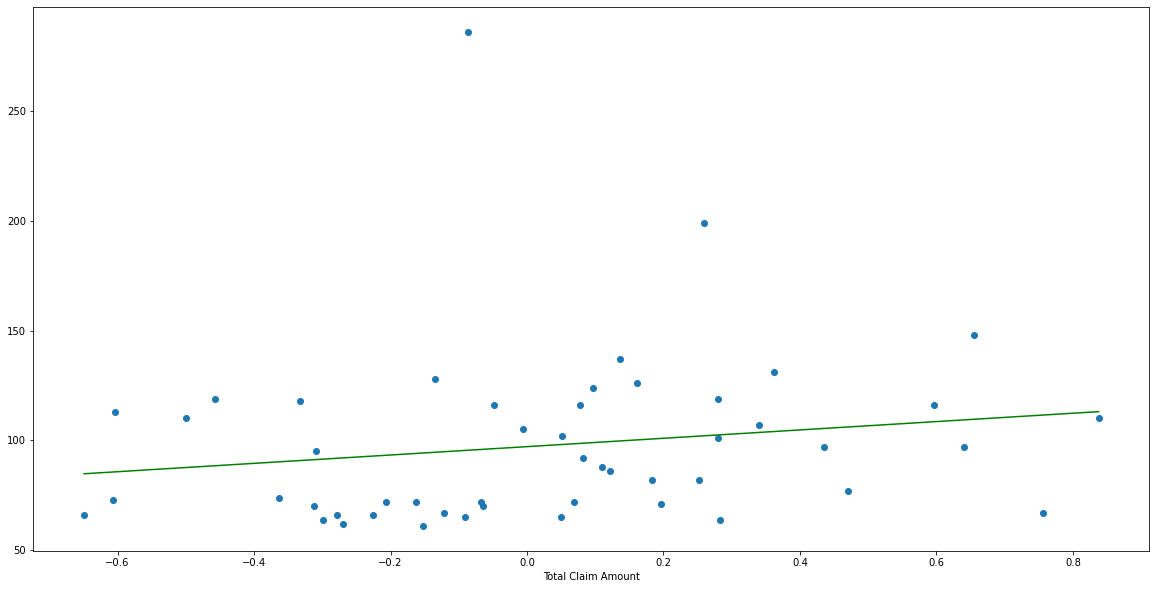

In [154]:
X_b = X_train_pca[:50,9].reshape(-1,1)
y_b = y_train[:50]
poly = PolynomialFeatures(degree = 1)
X_train_poly = poly.fit_transform(X_b)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_b)
plt.subplots(figsize = (20,10))
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
plt.scatter(X_b, y_b)
plt.plot(X_new , poly_reg.predict(poly.transform(X_new)), c = 'g', label = 'Polynomial regression')
plt.xlabel('Total Claim Amount')
plt.show()

# Comparison between PCA and Non PCA Dataset

**NON PCA Results**

| Model | Parameters | Train Scores | Test Scores|
| --- | --- | --- | --- |
| **Linear Regression** | NA | 0.8657| 0.8216 |
| **KNN Regression** | N_neighbors = 6 | 0.4986| 0.2959|
| **Lasso Regression** | Alpha = 0.1 | 0.8635 | 0.8234 |
| **Ridge Regression** | Alpha = 0.1 | 0.8657 | 0.8214|
| **RBF SVR** | C = 100, epsilon = 10, gamma = 0.1 | 0.8842 | 0.8085|
| **Linear SVR** | C = 100, epsilon = 10, gamma = 0.01 | 0.8567 |  0.8212 |
| **Poly SVR** |  C = 1, epsilon = 10, gamma = 1 | .0.9732 | 0.8185 |
| **Decision Tree Regression** | max_depth = 5, max_leaf_nodes = 10 |  0.9672 | 0.9443 |
| **Polynomial Regresion** | Degree = 1 |  0.8657 |  0.8216 |

**PCA Results**

| Model | Parameters | Train Scores | Test Scores|
| --- | --- | --- | --- |
| **Linear Regression** | NA | 0.8249| 0.7883 |
| **KNN Regression** | N_neighbors = 5 | 0.5091| 0.2676|
| **Lasso Regression** | Alpha = 0.01 | 0.8249 | 0.7887 |
| **Ridge Regression** | Alpha = 1 | 0.8248 | 0.7900|
| **RBF SVR** | C = 100, epsilon = 10, gamma = 0.1 | 0.8603 | 0.8022|
| **Linear SVR** | C = 100, epsilon = 10, gamma = 0.01 | 0.8123 |  0.7874 |
| **Poly SVR** |  C = 0.01, epsilon = 10, gamma = 10 | 0.9386 | 0.7389 |
| **Decision Tree Regresion** | max_depth = 2, max_leaf_nodes = 5 |  0.4549 | 0.4688 |
| **Polynomial Regresion** | Degree = 1 |  0.8249 | 0.7883 |

As we can see from our 2 tables, we can see that the majority of the PCA models have a slighly lower train and test than the non PCA results. Also, KNN, Lasso, Ridge, Poly, and Decision Tree have different parameters compared to their non PCA models. Another thing to be noted is the significant change in the Decision Tree model. Out of all the scores, it had the largest difference in scores. Overall, the PCA applied models had a worse score than the non PCA models. We can safely assume that we should not apply it. 

# Deep Learning

In [52]:
from sklearn.neural_network import MLPRegressor

In [56]:
param_gridmlp = [
        { 'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), 
                        (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)],
        'max_iter': (500,)}
        
       ]

In [57]:
grid_searchmlp = GridSearchCV(MLPRegressor(random_state=0), param_gridmlp, cv=5, n_jobs = -1, return_train_score=True)

In [58]:
grid_searchmlp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                 (6,), (7,), (8,), (9,), (10,),
                                                 (11,), (12,), (13,), (14,),
                                                 (15,), (16,), (17,), (18,),
                                                 (19,), (20,), (21,)],
                          'max_iter': (500,),
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             return_train_score=True)

In [59]:
print("Best parameters: {}".format(grid_searchmlp.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchmlp.best_score_))

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (15,), 'max_iter': 500, 'solver': 'sgd'}
Best cross-validation score: 0.8855


In [60]:
#since max_iter of = 200 does not coverge, I increased the iterations to 500 to coverge so we can get accurate results
mlp = MLPRegressor(random_state=0, activation = 'relu', solver = 'sgd', hidden_layer_sizes = (15,), max_iter = 500)

In [61]:
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(15,), max_iter=500, random_state=0,
             solver='sgd')

In [62]:
print('train: ', mlp.score(X_train, y_train))
print('test: ',mlp.score(X_test, y_test))

train:  0.9465121224676842
test:  0.8627618406863851


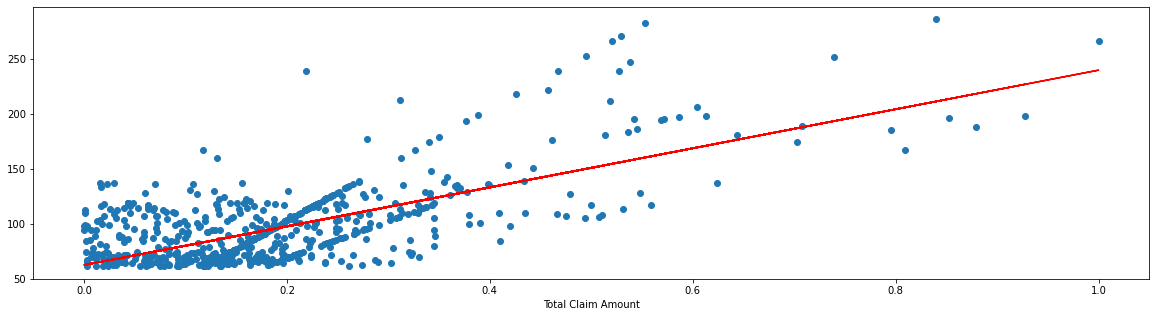

In [131]:
X_train_rm = X_train[:,9].reshape(-1,1)
mlp.fit(X_train_rm, y_train)
y_predict = mlp.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Total Claim Amount')
plt.show()

In [56]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential

In [105]:
model = keras.Sequential()
model.add(Dense(128, input_dim = 30, activation='relu', name = 'input_layer'))
model.add(Dense(64, activation='relu', name = 'hidden_layer'))
model.add(Dense(32, activation='relu', name = 'hidden_layer1'))
model.add(Dense(16, activation='relu', name = 'hidden_layer2'))
model.add(Dense(1, activation = 'linear', name = 'outer_layer') )

In [106]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 128)               3968      
_________________________________________________________________
hidden_layer (Dense)         (None, 64)                8256      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                528       
_________________________________________________________________
outer_layer (Dense)          (None, 1)                 17        
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(loss = 'mse',
              optimizer = 'adam', 
              metrics = ['mae','mse'])

In [108]:
history = model.fit(X_train, y_train, batch_size=128,  validation_split=0.2, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 222ms/step - loss: 10556.1353 - mae: 95.8961 - mse: 10556.1353 - val_loss: 9227.8535 - val_mae: 91.7565 - val_mse: 9227.8535
Epoch 2/100
5/5 [==============================] - 0s 32ms/step - loss: 10507.8659 - mae: 95.6276 - mse: 10507.8659 - val_loss: 9151.7080 - val_mae: 91.3424 - val_mse: 9151.7080
Epoch 3/100
5/5 [==============================] - 0s 26ms/step - loss: 10233.7017 - mae: 94.6011 - mse: 10233.7017 - val_loss: 9015.0830 - val_mae: 90.5948 - val_mse: 9015.0830
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 10046.6898 - mae: 93.8139 - mse: 10046.6898 - val_loss: 8785.4512 - val_mae: 89.3292 - val_mse: 8785.4512
Epoch 5/100
5/5 [==============================] - 0s 31ms/step - loss: 9831.4250 - mae: 92.2101 - mse: 9831.4250 - val_loss: 8405.6982 - val_mae: 87.1989 - val_mse: 8405.6982
Epoch 6/100
5/5 [==============================] - 0s 39ms/step - loss: 9261.3770 - mae: 89.2088 - mse: 9261.37

In [109]:
loss_and_metrics = model.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Mean Absolute Error", loss_and_metrics[1])
print("Mean Squared Error", loss_and_metrics[2])

9/9 [==============================] - 0s 2ms/step - loss: 162.0001 - mae: 8.3905 - mse: 162.0001
Test Loss 162.0000762939453
Mean Absolute Error 8.390542030334473
Mean Squared Error 162.0000762939453


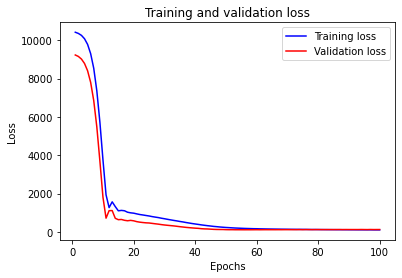

In [110]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

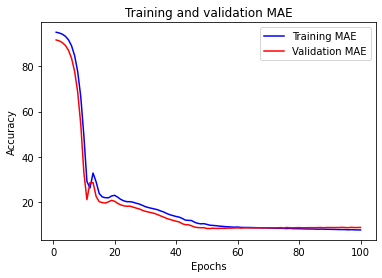

In [111]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'b', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As we see the higher the epochs go the lower our accuracy is for our deep learning model

# Convolutional Neural Network

In [58]:
X_test.shape

(259, 30)

In [59]:
X_train2 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test2 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1,1)

In [60]:
X_train2.shape

(776, 30, 1, 1)

In [61]:
X_test2.shape

(259, 30, 1, 1)

In [62]:
# step 1: build the model
model3 = Sequential()
# Must define the input shape in the first layer of the neural network
model3.add(Conv2D(filters=64, kernel_size=2, padding='same', 
                  activation='relu', input_shape=(30,1,1))) 
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(1, activation = 'linear'))


NameError: name 'Sequential' is not defined

In [97]:
model3.compile(loss='mse',
             optimizer='adam',
             metrics=['mae'])

In [98]:
model3.fit(X_train2, y_train, batch_size=64, epochs=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 1
  y sizes: 776
Make sure all arrays contain the same number of samples.

# Summary

Our best model was our Gradient Boosting Regressor model with the parameters of learning_rate = 0.01, max_depth = 5, and n_estimators = 500. We had a train score of 0.9909 and test score of 0.9304

In [183]:
ypred = gbr.predict(X_test)

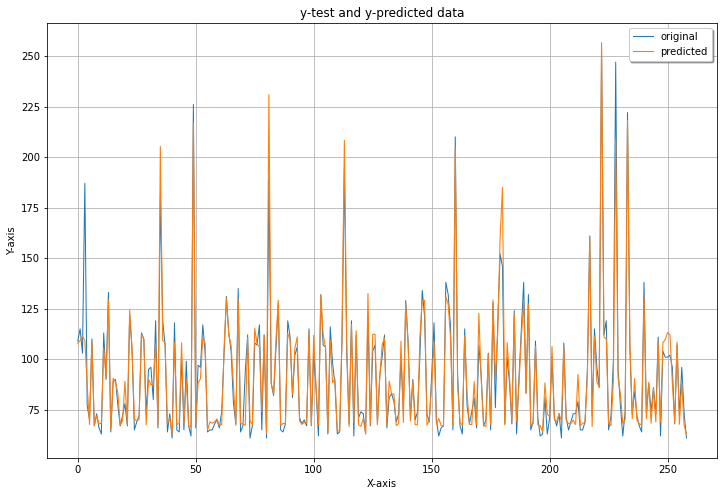

In [186]:
x_ax = range(len(y_test))
plt.subplots(figsize = (12,8))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 